# Explore Un-Encoded and Un-Scaled Data (easier for human consumption)
![](decoder_ring.jpeg)

# Model on Encoded and Scaled Data (models only train on numbers)
![](ovaltine.jpeg)

In [1]:
import pandas as pd
import seaborn as sns
from pydataset import data
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [2]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [3]:
df = data("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Handle any nulls early
# Handle any data type or other cleaning tasks here
df.isna().mean()

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### What's the State of this Data?
- Data types are good
- No Nulls
- 4 Categorical features

### Data Pre-processing Needs
- Encode these 4 categorical features
- We'll skip scaling (for now)

In [5]:
categorical_columns = [column for column in df.columns if df[column].dtype == "O"]
categorical_columns

['sex', 'smoker', 'day', 'time']

## 2 Ways of Handling our Encoded and Unencoded Values
Pick one and roll with it. One is not better or worse.

- Option 1 is to make one big dataframe containing encoded and un-encoded values. 
    - We'll explore on the un-encoded data, since it's easier to explore.
    - We'll send the encoded data into the `X_train` used to train the model.
- Option 2 is to make two separate dataframes. 
    - One df w/ encoded values (for modeling)
    - One df w/ the raw strings (for exploring)

## Option 1, One Big DataFrame for Everything
- Use `.get_dummies` on encoded values to produce a `dummy_df` then concat the `dummy_df` back onto the original `df`
- Split into `train`, `validate`, and `test`.
- Explore the un-encoded values on the `train` dataset
- Model on the encoded values from the `train` dataset

In [6]:
# Produce the dummy_df
dummy_df = pd.get_dummies(df[categorical_columns], drop_first=False)
dummy_df.head()

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
1,1,0,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,0,1,1,0,0,0,1,0,1,0
5,1,0,1,0,0,0,1,0,1,0


In [7]:
# Concat the dummy_df onto the original dataframe
# Now all of the un-encoded variables of sex, smoker, day, and time are on the df
# And all of the encoded versions of that data are on the same dataframe
df = pd.concat([df, dummy_df], axis=1)
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
1,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,0,0,0,1,0,1,0
2,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,0,0,0,1,0,1,0
3,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,0,0,0,1,0,1,0
4,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,0,0,0,1,0,1,0
5,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,0,0,0,1,0,1,0


In [8]:
# ALL the above code could be inside of youre pepare.py, might exist in multiple functions
# import prepare
# train, validate, test = prepare.clean_and_split(df)

In [9]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.day)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.day)

In [10]:
train.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
19,16.97,3.50,Female,No,Sun,Dinner,3,1,0,1,0,0,0,1,0,1,0
35,17.78,3.27,Male,No,Sat,Dinner,2,0,1,1,0,0,1,0,0,1,0
165,17.51,3.00,Female,Yes,Sun,Dinner,2,1,0,0,1,0,0,1,0,1,0
223,8.58,1.92,Male,Yes,Fri,Lunch,1,0,1,0,1,1,0,0,0,0,1
54,9.94,1.56,Male,No,Sun,Dinner,2,0,1,1,0,0,0,1,0,1,0


#### When you have one big `df`, explore the un-encoded values
- Unencoded values makes for easier/better visuals
- Unencoded values make for easier/better statistical tests

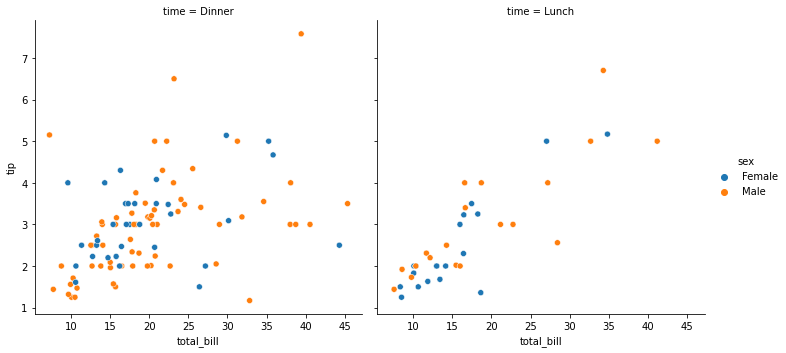

In [11]:
# Notice how we can visualize with two (un-encoded) categorical columns
# This would much more challenging if we used day_Thur, day_Fri, day_Sat, day_Sun rather than "day"
sns.relplot(x="total_bill", y="tip", hue="sex", col="time", data=train)

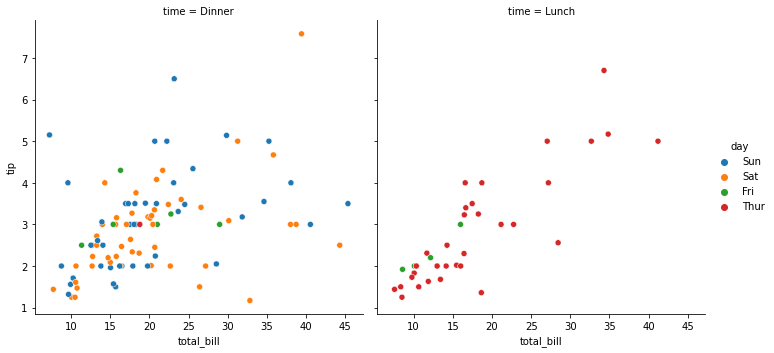

In [12]:
# Notice how we can visualize with two (un-encoded) categorical columns
# This would much more challenging if we used day_Thur, day_Fri, day_Sat, day_Sun rather than "day"
sns.relplot(x="total_bill", y="tip", hue="day", col="time", data=train)

In [13]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: smoking status and time of day are independed
# Alternative hypothesis: there is a relationship between smoking status and time of day
alpha = 0.05
observed = pd.crosstab(train.smoker, train.time)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that smoking status and day are independent")
    

The p-value is 0.7671892041816808
Insufficient evidence to reject the null
Evidence seems to support the claim that smoking status and day are independent


#### Split the data
- Define your target variable. For this exercise, I'll try to predict the time of day a table visits - lunch or dinner
- Split `df` into train, validate, and test
- When you're ready to model, we'll drop the encoded values from what goes into `X_train`, `X_validate`, and `X_test`

In [14]:
train.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
19,16.97,3.50,Female,No,Sun,Dinner,3,1,0,1,0,0,0,1,0,1,0
35,17.78,3.27,Male,No,Sat,Dinner,2,0,1,1,0,0,1,0,0,1,0
165,17.51,3.00,Female,Yes,Sun,Dinner,2,1,0,0,1,0,0,1,0,1,0
223,8.58,1.92,Male,Yes,Fri,Lunch,1,0,1,0,1,1,0,0,0,0,1
54,9.94,1.56,Male,No,Sun,Dinner,2,0,1,1,0,0,0,1,0,1,0


In [15]:
# If you happen to have an encoded version of the target variable, better get rid of it!
categorical_columns.append("time_Dinner")

In [16]:
categorical_columns.append("time_Lunch")

In [17]:
categorical_columns

['sex', 'smoker', 'day', 'time', 'time_Dinner', 'time_Lunch']

In [18]:
# Time is my target variable
# Isolate our X and y variables
# Notice how we're going to drop the un-encoded categorical colunns
# Since our target variable of "time" is inclouded here, we'll use 

# Remember that categorical_columns = ["time", "day", "sex", "smoker"]
# So we're dropping the target variable (since we can't predict a target if the target is one of the features)
# And we'll also drop all of the string columns that were un-encoded
X_train = train.drop(columns=categorical_columns)
y_train = train.time

X_validate = validate.drop(columns=categorical_columns)
y_validate = validate.time

X_test = test.drop(columns=categorical_columns)
y_test = test.time

# Notice how all of the X_train columns are numbers
# This means we're ready to send this data into a model
X_train.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
19,16.97,3.50,3,1,0,1,0,0,0,1,0
35,17.78,3.27,2,0,1,1,0,0,1,0,0
165,17.51,3.00,2,1,0,0,1,0,0,1,0
223,8.58,1.92,1,0,1,0,1,1,0,0,0
54,9.94,1.56,2,0,1,1,0,0,0,1,0


In [19]:
# Before modeling, we need to specify the baseline
baseline = train.time.mode().values[0]
baseline

'Dinner'

In [20]:
# Evaluate the baseline
# Our baseline accuracy is 72%
baseline_accuracy = (train.time == baseline).mean().round(2)
f"Our baseline accuracy is {baseline_accuracy}"

'Our baseline accuracy is 0.72'

In [21]:
# Make the model
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree = tree.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree.predict(X_train)

In [22]:
print("Model performance on training data:")
print(classification_report(y_train, y_predictions))

Model performance on training data:
              precision    recall  f1-score   support

      Dinner       0.99      1.00      0.99        98
       Lunch       1.00      0.97      0.99        38

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136



In [23]:
# Now let's evaluate this model on unseen data
y_validate_predictions = tree.predict(X_validate)

print("Model performance on training data:")
print(classification_report(y_validate, y_validate_predictions))

Model performance on training data:
              precision    recall  f1-score   support

      Dinner       0.98      0.95      0.96        43
       Lunch       0.88      0.94      0.91        16

    accuracy                           0.95        59
   macro avg       0.93      0.95      0.94        59
weighted avg       0.95      0.95      0.95        59



In [24]:
validate_accuracy = .95
difference = validate_accuracy - baseline_accuracy
percent_change = difference / validate_accuracy
percent_change

0.24210526315789474

#### Takeaways from this model:
- Seems like we have a pretty strong predictive model for predicting if a table is going to be a lunch table or a dinner table!

## Option 2, An un-encoded `train` dataframe for exploration. Another dataframe with encoded values for modeling
- After cleaning the dataframe and handling nulls, create an encoded dataframe 
- We'll explore the original un-encoded dataframe.
- This encoded dataframe will keep all the original numeric columns (or scale them, which we're ignoring for now)
- This encoded dataframe will have all of the `get_dummies` columns concatenated onto it.
- We'll train our models on the encoded `X_train`.

In [25]:
# Refresh the original, full dataset
df = data("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
# Isolate the numeric columns
numeric_columns = ["total_bill", "tip", "size"]

In [27]:
# Encode all of our categorical values
# Notice, we're NOT encoding the target, since we don't have to
dummy_df = pd.get_dummies(df[["sex", "smoker", "day"]])
dummy_df.head()

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
1,1,0,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,0,1,0
4,0,1,1,0,0,0,1,0
5,1,0,1,0,0,0,1,0


In [28]:
encoded_df = pd.concat([df[numeric_columns], dummy_df, df.time], axis=1)
encoded_df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time
1,16.99,1.01,2,1,0,1,0,0,0,1,0,Dinner
2,10.34,1.66,3,0,1,1,0,0,0,1,0,Dinner
3,21.01,3.50,3,0,1,1,0,0,0,1,0,Dinner
4,23.68,3.31,2,0,1,1,0,0,0,1,0,Dinner
5,24.59,3.61,4,1,0,1,0,0,0,1,0,Dinner
...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,3,0,1,1,0,0,1,0,0,Dinner
241,27.18,2.00,2,1,0,0,1,0,1,0,0,Dinner
242,22.67,2.00,2,0,1,0,1,0,1,0,0,Dinner
243,17.82,1.75,2,0,1,1,0,0,1,0,0,Dinner


In [29]:
# We can make an unencoded split
# Time to split!
encoded_train, encoded_test = train_test_split(encoded_df, test_size=.2, random_state=123, stratify=encoded_df.time)
encoded_train, encoded_validate = train_test_split(encoded_train, test_size=.3, random_state=123, stratify=encoded_train.time)
encoded_train.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time
8,26.88,3.12,4,0,1,1,0,0,0,1,0,Dinner
76,10.51,1.25,2,0,1,1,0,0,1,0,0,Dinner
167,20.76,2.24,2,0,1,1,0,0,0,1,0,Dinner
240,29.03,5.92,3,0,1,1,0,0,1,0,0,Dinner
115,25.71,4.00,3,1,0,1,0,0,0,1,0,Dinner


In [30]:
# Un-encoded data
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.day)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.day)
train.head()

,total_bill,tip,sex,smoker,day,time,size
19,16.97,3.50,Female,No,Sun,Dinner,3
35,17.78,3.27,Male,No,Sat,Dinner,2
165,17.51,3.00,Female,Yes,Sun,Dinner,2
223,8.58,1.92,Male,Yes,Fri,Lunch,1
54,9.94,1.56,Male,No,Sun,Dinner,2


## Explore un-encoded data
- Run stats and visuals on un-encoded data

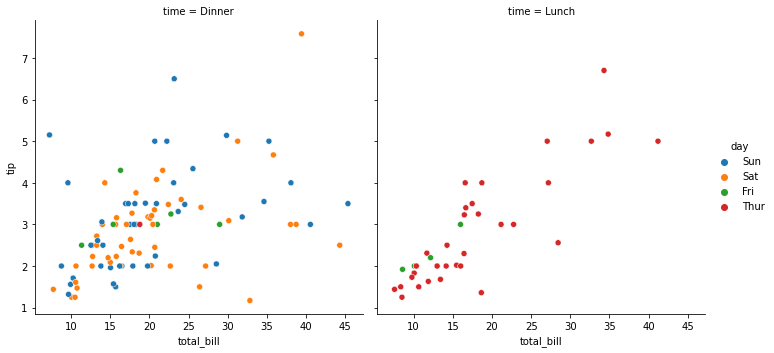

In [31]:
# We're exploring UN-encoded data
sns.relplot(x="total_bill", y="tip", hue="day", col="time", data=train)

In [32]:
## Now it's time to model
# We'll separate the X and y values

# Time is my target variable
# Isolate our X and y variables
# Notice how we're going to drop the un-encoded categorical colunns
# Since our target variable of "time" is inclouded here, we'll use 

# Remember that categorical_columns = ["time", "day", "sex", "smoker"]
# So we're dropping the target variable (since we can't predict a target if the target is one of the features)
# And we'll also drop all of the string columns that were un-encoded
X_train = encoded_train.drop(columns="time")
y_train = encoded_train.time

X_validate = encoded_validate.drop(columns="time")
y_validate = encoded_validate.time

X_test = encoded_test.drop(columns="time")
y_test = encoded_test.time

# Notice how all of the X_train columns are numbers
# This means we're ready to send this data into a model
X_train.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
8,26.88,3.12,4,0,1,1,0,0,0,1,0
76,10.51,1.25,2,0,1,1,0,0,1,0,0
167,20.76,2.24,2,0,1,1,0,0,0,1,0
240,29.03,5.92,3,0,1,1,0,0,1,0,0
115,25.71,4.00,3,1,0,1,0,0,0,1,0


In [50]:
# Make the model
tree = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fit the model (on train and only train)
tree = tree.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree.predict(X_train)

In [51]:
print("Model performance on training data:")
print(classification_report(y_train, y_predictions))

Model performance on training data:
              precision    recall  f1-score   support

      Dinner       1.00      1.00      1.00        98
       Lunch       1.00      1.00      1.00        38

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



In [52]:
# Now let's evaluate out of sample results
y_validate_predictions = tree.predict(X_validate)

print("Model performance on training data:")
print(classification_report(y_validate, y_validate_predictions))

Model performance on training data:
              precision    recall  f1-score   support

      Dinner       1.00      0.98      0.99        43
       Lunch       0.94      1.00      0.97        16

    accuracy                           0.98        59
   macro avg       0.97      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59

